In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_excel("C:/Users/rayya/Downloads/archive (5)/WA_Fn-UseC_-Telco-Customer-Churn.xlsx")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#customer id is irrelevant to us so we will remove that column
data = data.drop('customerID', axis = 1)

In [8]:
#now we must convert the other categorical data to numerical data

In [9]:
#converting the target variable ie. Churn into binary varible
le = LabelEncoder()
data['Churn'] = le.fit_transform(data['Churn'])

In [10]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [11]:
#here we can see that Total Charges is Object so we must convert it to Numerical Data
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [12]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
imputer = SimpleImputer(strategy = 'mean')

In [14]:
#dropping these values from the data
data.dropna(inplace = True)

In [15]:
data.isnull().sum()
#now we can see that there are no more missing values on the data

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
data.isnull().sum()
#from this we can see that there are no missing values so no need of any imputation

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
data_dummies = pd.get_dummies(data)

In [18]:
data_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


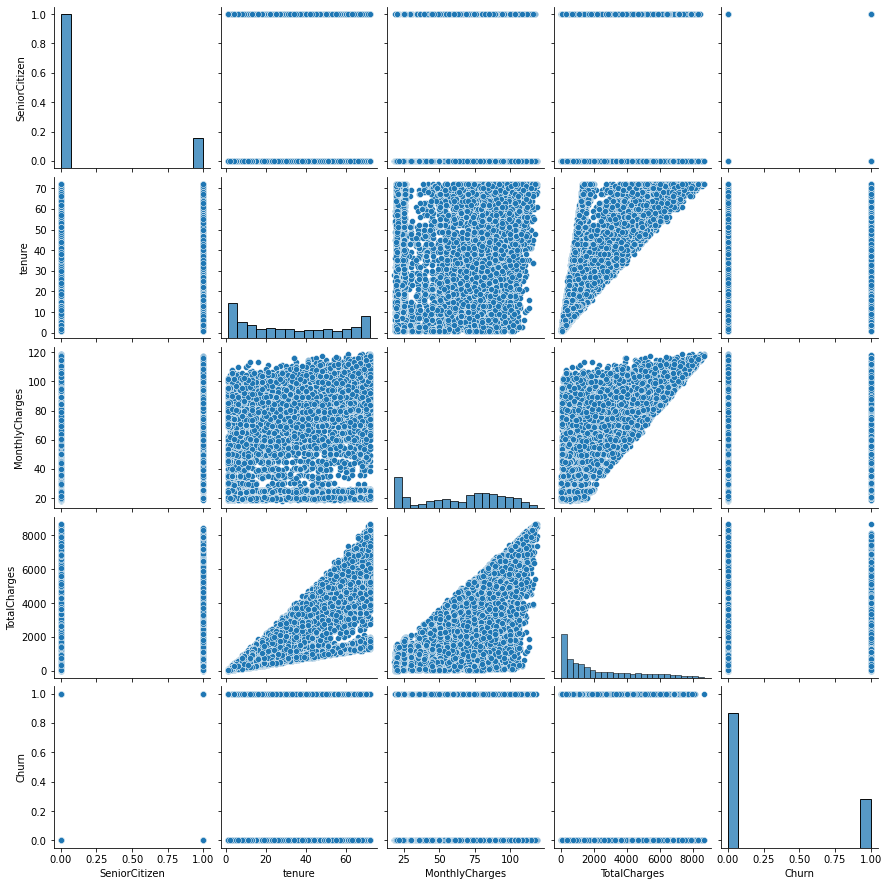

In [19]:
sns.pairplot(data)

<AxesSubplot:>

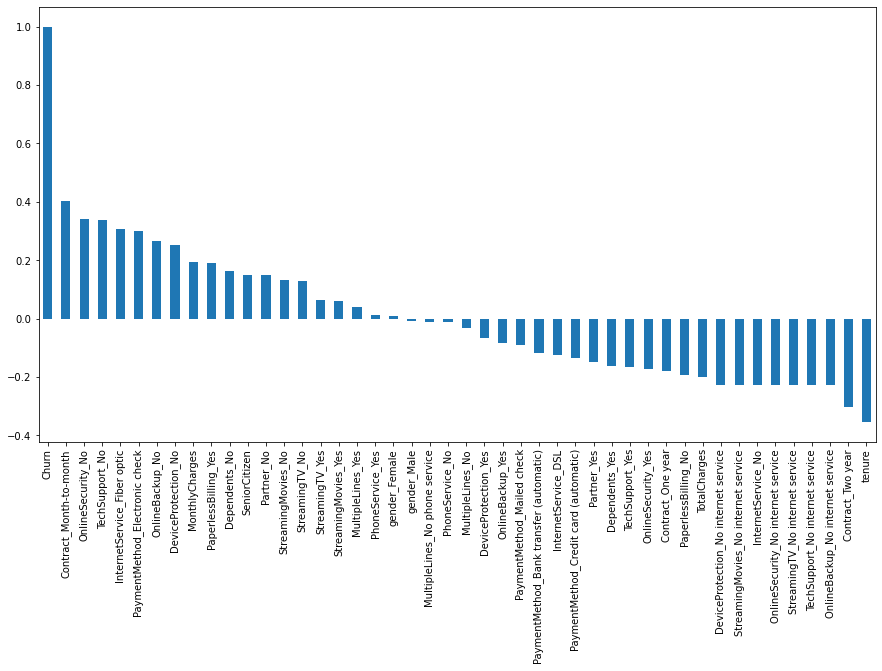

In [20]:
plt.figure(figsize=(15,8))
data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [21]:
#from here we can see the correlation between variables and see which one effects target varibale

In [22]:
#we can see that Month to Month Conract, MonthlyCharges, PaperlessBilling, SeniorCitizen etc is Positively Correlated to Churn
#we cans see that TwoYearContract, Tenure, OnlineSecurity, TechSuport, TotalCharges etc is Negatively Correlated to Churn

In [23]:
#now we will look at some features to better understand the data

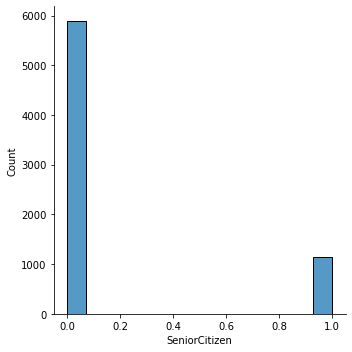

In [24]:
sns.displot(data_dummies['SeniorCitizen'])
#this tells us that majority of customers are young and are not seniors

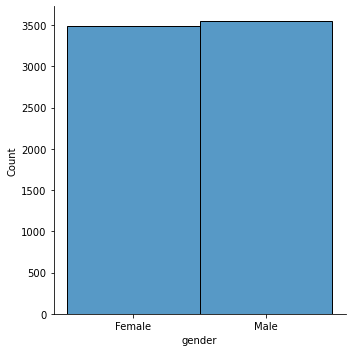

In [25]:
sns.displot(data['gender'])
#this shows that there are almost the same number of females as they are males

In [26]:
data_dummies.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two

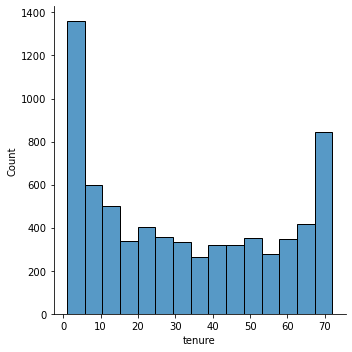

In [27]:
sns.displot(data['tenure'])
#this tells us that most contracts were either 1-5 months or more than 2 years

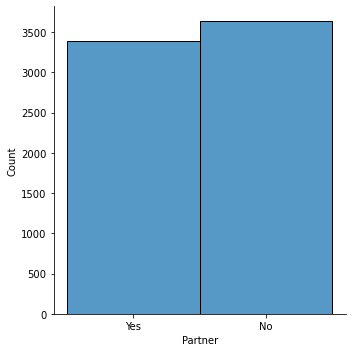

In [28]:
sns.displot(data['Partner'])
#this tells us that ratio of people of had and hadnt had a partner was almost 50%-50%

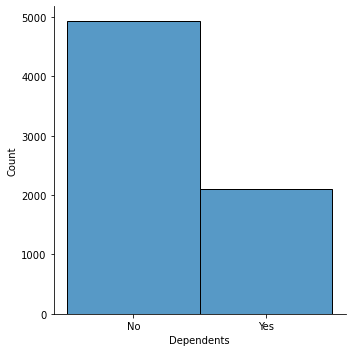

In [29]:
sns.displot(data['Dependents'])
#majority of people didnot have any dependents

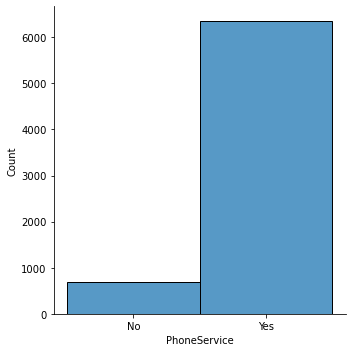

In [30]:
sns.displot(data['PhoneService'])
#majority of people did not have phone service

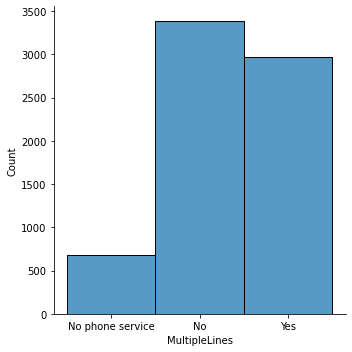

In [31]:
sns.displot(data['MultipleLines'])
#very few people dont have any phone service while the number of people who do and dont have service is approximately the same

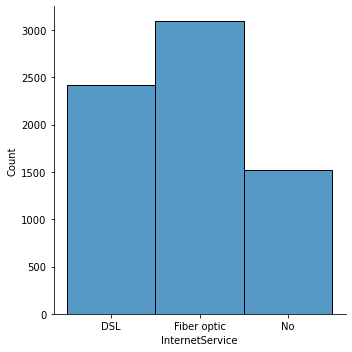

In [32]:
sns.displot(data['InternetService'])
#most people have Fiber Optic Service follwed by DSL and then bY No service

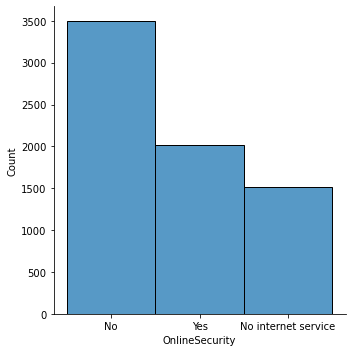

In [33]:
sns.displot(data['OnlineSecurity'])
#most people dont have online security while some people dont have internet service

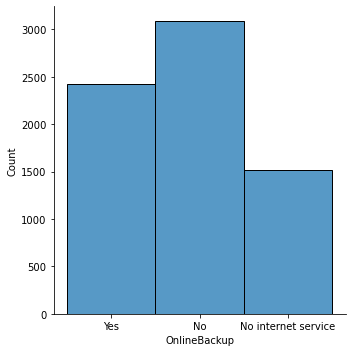

In [34]:
sns.displot(data['OnlineBackup'])
#most people dont have any online backup while some people dont have an internet service

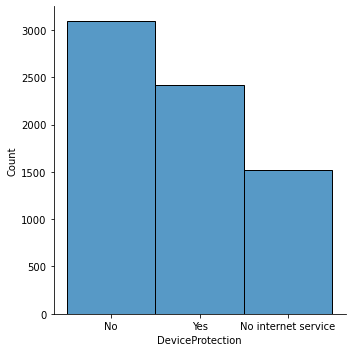

In [35]:
sns.displot(data['DeviceProtection'])
#most people dont have device protection while some dont have internet service

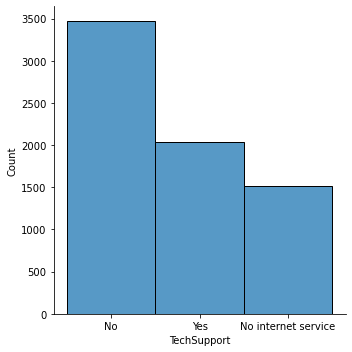

In [36]:
sns.displot(data['TechSupport'])

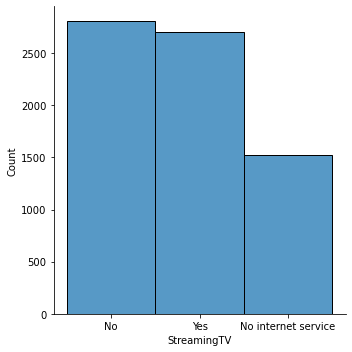

In [37]:
sns.displot(data['StreamingTV'])
#most people dont have streaming TV while some dont have an internet connection

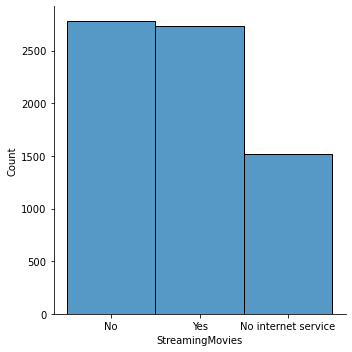

In [38]:
sns.displot(data['StreamingMovies'])
#most people dont stream movies while some dont have an internet connection

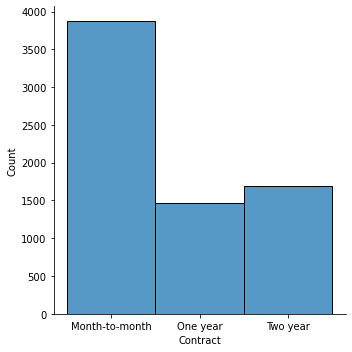

In [39]:
sns.displot(data['Contract'])
#most people have month to month contracts followed by Two Year Contracts followed by One year contracts

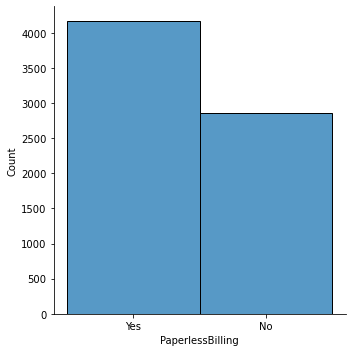

In [40]:
sns.displot(data['PaperlessBilling'])
#most people have paperlessbilling while about 30% do not 

In [41]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

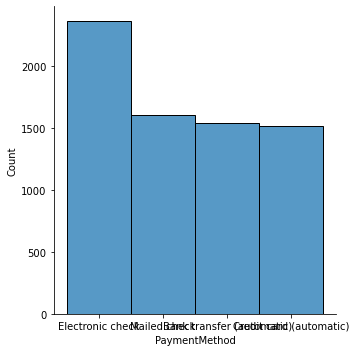

In [42]:
sns.displot(data['PaymentMethod'])

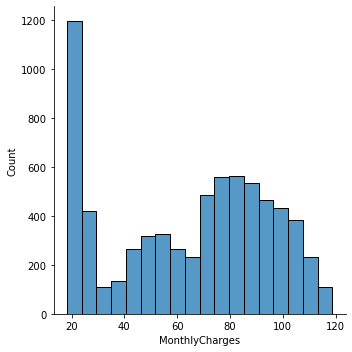

In [43]:
sns.displot(data['MonthlyCharges'])

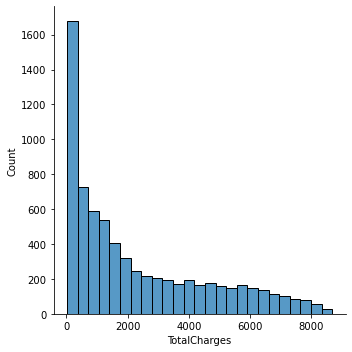

In [44]:
sns.displot(data['TotalCharges'])

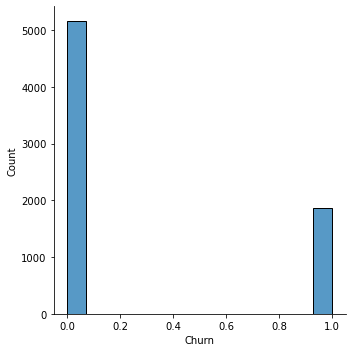

In [45]:
sns.displot(data['Churn'])
#most people do not churn as expected while only a few number of people churn

Text(0.5, 0.98, 'Distribution of Total Charges by Churn')

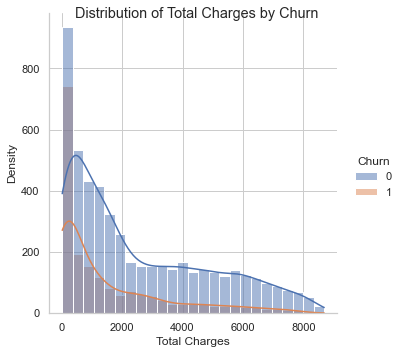

In [46]:
sns.set(style='whitegrid')
plot = sns.displot(data=data, x='TotalCharges', hue='Churn', kde=True)

plot.set_axis_labels("Total Charges", "Density")
plot.fig.suptitle("Distribution of Total Charges by Churn")

#from here we can see that as total charges were low then less customers tend to churn

Text(0.5, 0.98, 'Distribution of Monthly Charges by Churn')

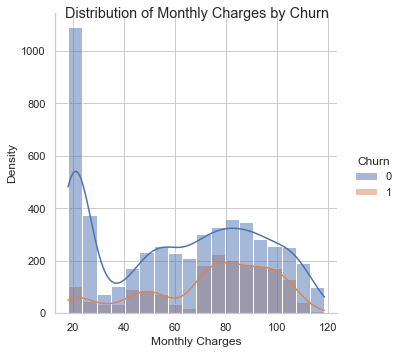

In [47]:
sns.set(style='whitegrid')
plot = sns.displot(data=data, x='MonthlyCharges', hue='Churn', kde=True)

plot.set_axis_labels("Monthly Charges", "Density")
plot.fig.suptitle("Distribution of Monthly Charges by Churn")
 
#from this we can see that as the monthly charges were low, there was no churn and as charges increased more customers tend to churn

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [65]:
#logistic regression

#defining X and Y
X = data_dummies.drop(columns = ['Churn'])
y = data_dummies['Churn'].values

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [67]:
model = LogisticRegression(max_iter = 1000)
result = model.fit(X_train, y_train)

In [68]:
prediction_test = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8009478672985783


In [69]:
#SVM
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42 )

In [70]:
#model.svm = SVC(kernel='linear') 
#model.svm.fit(X_train,y_train)
#preds = model.svm.predict(X_test)
#metrics.accuracy_score(y_test, preds)

In [71]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [72]:
#model.svm = SVR(kernel='linear') 
#model.svm.fit(X_train,y_train)
#preds = model.svm.predict(X_test)
#metrics.accuracy_score(y_test, preds)

In [73]:
#Decision Tree
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [74]:
#USING GRIDSEARCH

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [75]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=16, random_state=42)

In [76]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.7919000430848772

In [77]:
X = data_dummies.drop(columns = ['Churn'])
y = data_dummies['Churn'].values

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [79]:
models = {
    "LogisiticRegression": LogisticRegression(max_iter = 1000),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "NaiveBayesClassifier": GaussianNB(),
    "StochasticGradient": SGDClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier()
}

In [80]:
from sklearn.model_selection import cross_val_score


for key, model in models.items():
    model.fit(X_train, y_train)
    training_score = cross_val_score(model, X_train, y_train, cv=5)
    print("Models: ", model.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Models:  LogisticRegression has a training score of 80.0 % accuracy score
Models:  SVC has a training score of 73.0 % accuracy score
Models:  DecisionTreeClassifier has a training score of 73.0 % accuracy score
Models:  RandomForestClassifier has a training score of 79.0 % accuracy score
Models:  GaussianNB has a training score of 70.0 % accuracy score
Models:  SGDClassifier has a training score of 77.0 % accuracy score
Models:  AdaBoostClassifier has a training score of 80.0 % accuracy score
Models:  GradientBoostingClassifier has a training score of 80.0 % accuracy score


In [81]:
#svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
#grid_svc = GridSearchCV(SVC(), svc_params)
#grid_svc.fit(X_train, y_train)

#svc = grid_svc.best_estimator_
#print(svc)

#print(cross_val_score(svc, X_train, y_train, cv=5))

In [82]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
print(grid_tree)
tree_clf = grid_tree.best_estimator_

print(cross_val_score(tree_clf, X_train, y_train, cv=5))

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3],
                         'min_samples_leaf': [5, 6]})
[0.7709438  0.77707006 0.79617834 0.78131635 0.80254777]


In [83]:
rfc_params = {'criterion':['gini', 'entropy', 'log_loss'],'n_estimators': [10, 50, 100], 'min_samples_leaf': [1, 2, 4],}

grid_forest = GridSearchCV(RandomForestClassifier(), rfc_params)
grid_forest.fit(X_train, y_train)
print(grid_forest.best_estimator_)

rfc = grid_forest.best_estimator_
print(cross_val_score(rfc, X_train, y_train, cv=5))

RandomForestClassifier(criterion='log_loss', min_samples_leaf=4)
[0.80275716 0.77707006 0.79830149 0.79511677 0.81847134]


In [84]:
ada_params = {'n_estimators': [10, 50, 100, 500], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0], 'algorithm': ['SAMME', 'SAMME.R']}

grid_ada = GridSearchCV(AdaBoostClassifier(), ada_params)
grid_ada.fit(X_train, y_train)
print(grid_ada.best_estimator_)
ada = grid_ada.best_estimator_

print(cross_val_score(ada, X_train, y_train, cv=5))

AdaBoostClassifier(learning_rate=0.1, n_estimators=500)
[0.80911983 0.78237792 0.8163482  0.79617834 0.82165605]


In [85]:
gb_params = {'n_estimators': [100], 'learning_rate': [1.0], 'max_depth': [1], 'random_state': [0]}

grid_gb = GridSearchCV(GradientBoostingClassifier(), gb_params)
grid_gb.fit(X_train, y_train)
print(grid_gb.best_estimator_)
gb = grid_gb.best_estimator_

print(cross_val_score(gb, X_train, y_train, cv=5))

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)
[0.79957582 0.77494692 0.81847134 0.79723992 0.8163482 ]


In [86]:
classifiers = {
    "LogisticRegression": LogisticRegression(solver="lbfgs", random_state=42, max_iter = 1000 ),
    "Support Vector Classifier": SVC(gamma="scale", random_state=42),
    "DecisionTreeClassifier": DecisionTreeClassifier(criterion = "gini", random_state = 42),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "NaiveBayesClassifier": GaussianNB(),
    "StochasticGradient": SGDClassifier(loss="log_loss", max_iter=1000, random_state=42),
    "AdaBoostClassifier": AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(n_estimators=100, max_depth=2, learning_rate=0.1, subsample=1.0)
}


voting_clf = VotingClassifier(estimators=[(name, clf) for name, clf in classifiers.items()], voting='hard')

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
accuracy = voting_clf.score(X_test, y_test)

print(f"Accuracy: {accuracy}")
individual_scores = {}

Accuracy: 0.8013787160706592


In [87]:
#USING ENSEMBLE

voting_clf = VotingClassifier(estimators=[(name, clf) for name, clf in classifiers.items()], voting='hard')

voting_clf.fit(X_train, y_train)

individual_scores = {}

for name, clf in voting_clf.named_estimators_.items():
    score = clf.score(X_test, y_test)
    individual_scores[name] = score

print("Classifier Scores:")
for name, score in individual_scores.items():
    print(f"{name}: {score}")

Classifier Scores:
LogisticRegression: 0.8009478672985783
Support Vector Classifier: 0.7371822490305903
DecisionTreeClassifier: 0.7186557518311073
RandomForestClassifier: 0.7875915553640672
NaiveBayesClassifier: 0.6902197328737613
StochasticGradient: 0.7720809995691512
AdaBoostClassifier: 0.7966393795777682
GradientBoostingClassifier: 0.8043946574752262


In [88]:
#COMPARING THE PRECSION, RECALL, F1 AND ACCURACY SCORES

logistic_regression = LogisticRegression(solver="lbfgs", random_state=42, max_iter = 1000)
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion}")

Accuracy: 0.8009478672985783
Precision: 0.6456692913385826
Recall: 0.5377049180327869
F1 Score: 0.5867620751341681
Confusion Matrix:
[[1531  180]
 [ 282  328]]


In [89]:
Support_Vector_Classifier = SVC(gamma="scale", random_state=42)
Support_Vector_Classifier.fit(X_train, y_train)

y_pred = Support_Vector_Classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division = 0)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion}")

Accuracy: 0.7371822490305903
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[1711    0]
 [ 610    0]]


In [90]:
DecisionTreeClassifier = DecisionTreeClassifier(criterion = "gini", random_state = 42)
DecisionTreeClassifier.fit(X_train, y_train)

y_pred = DecisionTreeClassifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion}")

Accuracy: 0.7186557518311073
Precision: 0.46614173228346456
Recall: 0.4852459016393443
F1 Score: 0.4755020080321285
Confusion Matrix:
[[1372  339]
 [ 314  296]]


In [91]:
RandomForestClassifier = RandomForestClassifier(n_estimators=100, random_state=42)
RandomForestClassifier.fit(X_train, y_train)

y_pred = RandomForestClassifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion}")

Accuracy: 0.7875915553640672
Precision: 0.6191446028513238
Recall: 0.49836065573770494
F1 Score: 0.5522252497729336
Confusion Matrix:
[[1524  187]
 [ 306  304]]


In [92]:
NaiveBayesClassifier = GaussianNB()
NaiveBayesClassifier.fit(X_train, y_train)


y_pred = NaiveBayesClassifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion}")

Accuracy: 0.6902197328737613
Precision: 0.45181255526083114
Recall: 0.8377049180327869
F1 Score: 0.5870189546237794
Confusion Matrix:
[[1091  620]
 [  99  511]]


In [93]:
StochasticGradient = SGDClassifier(loss="log_loss", max_iter=1000, random_state=42)
StochasticGradient.fit(X_train, y_train)
y_pred = StochasticGradient.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion}")

Accuracy: 0.7720809995691512
Precision: 0.7014925373134329
Recall: 0.23114754098360657
F1 Score: 0.34771886559802717
Confusion Matrix:
[[1651   60]
 [ 469  141]]


In [94]:
AdaBoostClassifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
AdaBoostClassifier.fit(X_train, y_train)

y_pred = AdaBoostClassifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion}")

Accuracy: 0.7966393795777682
Precision: 0.6413934426229508
Recall: 0.5131147540983606
F1 Score: 0.570127504553734
Confusion Matrix:
[[1536  175]
 [ 297  313]]


In [95]:
GradientBoostingClassifier = GradientBoostingClassifier(n_estimators=100, max_depth=2, learning_rate=0.1, subsample=1.0)
GradientBoostingClassifier.fit(X_train, y_train)
y_pred = GradientBoostingClassifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion}")

Accuracy: 0.8043946574752262
Precision: 0.6645569620253164
Recall: 0.5163934426229508
F1 Score: 0.5811808118081181
Confusion Matrix:
[[1552  159]
 [ 295  315]]


In [96]:
#After looking at the precision, recall, F1 and accuracy scores along with the confusion matrices of all the models both
#indicidually and after being used in an ensemble, we can see that the results of the ensemble and individual models are 
#somewhat the same however wehen used in a ensemble performed minimally better than individual models. 